In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [18]:
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('ushape.csv')

In [22]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [24]:
df.rename(columns={'3.159499363321345566e-02': 'X', '9.869877579082642072e-01': 'Y','0.000000000000000000e+00':'class'}, inplace=True)

In [25]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


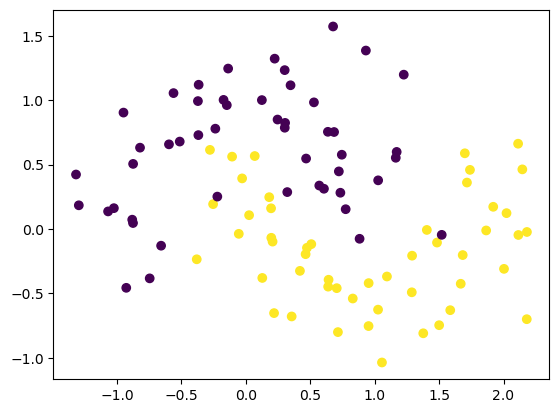

In [26]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [28]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [29]:
model=Sequential()

In [30]:
model.add(Dense(10,activation='relu', input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model?


In [7]:
model.get_weights()

[array([[ 0.18726553,  2.2120843 ,  1.7418038 ,  1.8111422 ,  1.6497644 ,
         -0.23700961, -0.14019176,  0.8092722 , -1.6920321 , -0.91717386],
        [-0.45880482,  1.4209385 ,  1.1186025 , -0.10235941,  1.9897883 ,
          1.1571646 , -0.35086086,  2.2093177 ,  1.1276935 ,  0.79598695]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.07579365,  0.40038243, -0.20783892, -0.52819866, -0.01004149,
          0.57695657,  0.21282005,  0.2995214 ,  0.26107907, -0.0329571 ],
        [ 0.16646574,  0.41467807, -0.1260734 , -0.01868008,  0.6835843 ,
         -0.10177644, -0.73465854, -0.5305242 ,  0.24740264, -0.68087685],
        [ 0.8343725 ,  0.06932276, -0.51041687,  0.10683841, -0.49493054,
         -0.29482195, -0.379548  , -0.09096699, -0.5629694 , -0.45898905],
        [ 0.28220025, -0.09061925, -0.14391005, -0.40321347, -0.07932976,
         -0.65339464, -0.5552505 ,  0.62962997,  0.4970135 ,  0.9415892 ],
        [ 0.10123

In [32]:
initial_weights=model.get_weights()

In [33]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [34]:
model.set_weights(initial_weights)

In [35]:
model.get_weights()

[array([[ 1.3925159 , -0.60018164,  0.6343198 ,  0.26203826,  1.2400154 ,
         -0.12313469,  1.462562  ,  0.05869039,  0.12395876, -0.09094589],
        [ 0.8726959 , -0.2507754 ,  0.03035856,  0.3157869 ,  0.53857416,
         -0.5606472 ,  0.41361308,  0.34094805,  1.4791864 , -1.0543929 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.63840014, -0.05001254, -0.14806184, -0.09700068,  0.26770216,
          0.30188572,  0.16863616, -0.04176444, -0.2713266 , -0.3396912 ],
        [ 0.00907089,  0.05011559, -0.18075553,  0.0442529 , -0.39984727,
          0.44267356,  0.24156752,  0.3277596 , -0.23946847, -0.27701172],
        [-0.34238285, -0.60112387, -0.18722115, -0.15780553, -0.5762408 ,
         -0.08627429, -0.07856511,  0.27352065, -0.2774005 ,  0.28418502],
        [-0.2761285 , -0.07880705,  0.39177722,  0.3706087 , -0.06163566,
         -0.3717889 ,  0.00441189, -0.41208944, -0.39021614,  0.12007345],
        [-0.43734

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.5007 - loss: 0.7169 - val_accuracy: 0.5000 - val_loss: 0.7143
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4719 - loss: 0.7183 - val_accuracy: 0.5000 - val_loss: 0.7038
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4914 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5407 - loss: 0.6827 - val_accuracy: 0.5000 - val_loss: 0.6857
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5173 - loss: 0.6752 - val_accuracy: 0.5500 - val_loss: 0.6776
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5197 - loss: 0.6750 - val_accuracy: 0.6000 - val_loss: 0.6699
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5495 - loss: 0.6615 - val_accuracy: 0.6000 - val_loss: 0.6616
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5934 - loss: 0.6458 - val_accuracy: 0.6000 - val_loss

In [38]:
model.get_weights()

[array([[ 1.3918895 , -0.9227773 ,  0.51009995,  0.2504229 ,  1.2502184 ,
          0.07511754,  1.5199735 , -0.01246525, -0.0131368 ,  0.06905408],
        [ 0.98950666, -0.30673668, -0.0379278 ,  0.27599803,  0.35884753,
         -0.77455527,  0.19309643,  0.49732095,  1.6284819 , -1.3000387 ]],
       dtype=float32),
 array([ 0.01959362,  0.073266  , -0.21262412,  0.03677923, -0.07710917,
         0.06022915,  0.00090437,  0.10907216,  0.09559251,  0.15758133],
       dtype=float32),
 array([[ 0.6921344 , -0.01474126, -0.14378501, -0.12856968,  0.3613431 ,
          0.325257  ,  0.16863616, -0.09181743, -0.20836377, -0.3836297 ],
        [ 0.29588804, -0.15406306, -0.26724598,  0.00349564, -0.34490216,
          0.7375206 ,  0.1582057 ,  0.5612792 , -0.42571053, -0.2955622 ],
        [-0.38154778, -0.4729621 , -0.17335196, -0.17612727, -0.55756545,
         -0.08621078, -0.07856511,  0.19272481, -0.11611266,  0.22427864],
        [-0.21073364, -0.08090725,  0.39593986,  0.3280167 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


<Axes: >

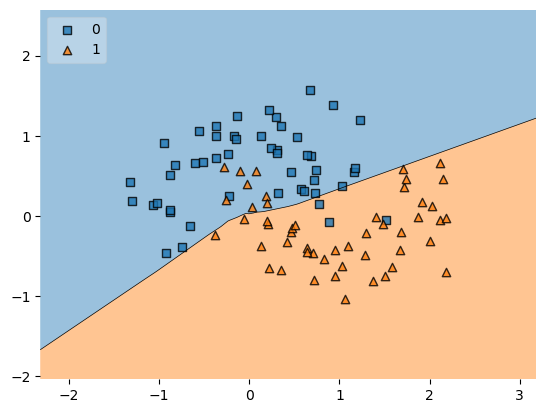

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [40]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.026535756365541556)

In [41]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.023536463255779037)